In [1]:
import os

In [2]:
os.getcwd()

'/root/Arghya_scripts/Alenza/Alenza_nlp'

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
con_bhv_df = pd.read_csv('Customer_behaviour_analysis.csv')

In [6]:
con_bhv_df.head(10)

,topic,word,lifecycle
0,Amenities,air con,stay
1,Amenities,air conditioner,stay
2,Amenities,air conditioner,before arrival
3,Amenities,air conditioning,stay
4,Amenities,airport shuttle,before arrival
5,Amenities,airport shuttle,stay
6,Amenities,balcony,stay
7,Amenities,bar,stay
8,Amenities,barbeque,stay
9,Amenities,bars,stay


In [7]:
con_bhv_df.shape

(603, 3)

In [8]:
con_bhv_df.topic.unique()

array(['Amenities', 'Experience', 'Location', 'Transactions', 'Value',
       'value', 'transactions', 'location', 'experience', 'amenities'],
      dtype=object)

In [9]:
con_bhv_df['topic'].replace({'value': 'Value', 'transactions': 'Transactions', 'location': 'Location', 'experience': 'Experience','amenities': 'Amenities'})


0         Amenities
1         Amenities
2         Amenities
3         Amenities
4         Amenities
5         Amenities
6         Amenities
7         Amenities
8         Amenities
9         Amenities
10        Amenities
11        Amenities
12        Amenities
13        Amenities
14        Amenities
15        Amenities
16        Amenities
17        Amenities
18        Amenities
19        Amenities
20        Amenities
21        Amenities
22        Amenities
23        Amenities
24        Amenities
25        Amenities
26        Amenities
27        Amenities
28        Amenities
29        Amenities
           ...     
573      Experience
574       Amenities
575      Experience
576           Value
577           Value
578        Location
579           Value
580      Experience
581      Experience
582        Location
583    Transactions
584    Transactions
585      Experience
586       Amenities
587      Experience
588      Experience
589      Experience
590    Transactions
591           Value


In [10]:
con_bhv_df.topic.unique()

array(['Amenities', 'Experience', 'Location', 'Transactions', 'Value',
       'value', 'transactions', 'location', 'experience', 'amenities'],
      dtype=object)

In [11]:
#converting small case to caps
con_bhv_df['topic'] = con_bhv_df['topic'].replace({'value': 'Value', 'transactions': 'Transactions', 'location': 'Location', 'experience': 'Experience','amenities': 'Amenities'})


In [12]:
con_bhv_df.topic.unique()

array(['Amenities', 'Experience', 'Location', 'Transactions', 'Value'],
      dtype=object)

In [13]:
con_bhv_df.dtypes

topic        object
word         object
lifecycle    object
dtype: object

In [14]:
#checking for null values
con_bhv_df[con_bhv_df.isnull().any(axis=1)]

,topic,word,lifecycle


In [15]:
con_bhv_df["topic"].value_counts()

Experience      195
Value           122
Location        101
Amenities       100
Transactions     85
Name: topic, dtype: int64

In [16]:
con_bhv_df.head(10)

,topic,word,lifecycle
0,Amenities,air con,stay
1,Amenities,air conditioner,stay
2,Amenities,air conditioner,before arrival
3,Amenities,air conditioning,stay
4,Amenities,airport shuttle,before arrival
5,Amenities,airport shuttle,stay
6,Amenities,balcony,stay
7,Amenities,bar,stay
8,Amenities,barbeque,stay
9,Amenities,bars,stay


In [17]:
con_bhv_df.to_csv("/root/Arghya_scripts/Alenza/Alenza_nlp/customer_BEHAVIOUR_Analysis", sep=',', encoding='utf-8',index=False)

In [18]:
import copy

In [19]:
con_bhv_df_labelencode = copy.deepcopy(con_bhv_df)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
#doing label encoding  encoding to the class labels in topic
lb_make = LabelEncoder()
con_bhv_df_labelencode['topic_code'] = lb_make.fit_transform(con_bhv_df_labelencode['topic'])

con_bhv_df_labelencode.head()

,topic,word,lifecycle,topic_code
0,Amenities,air con,stay,0
1,Amenities,air conditioner,stay,0
2,Amenities,air conditioner,before arrival,0
3,Amenities,air conditioning,stay,0
4,Amenities,airport shuttle,before arrival,0


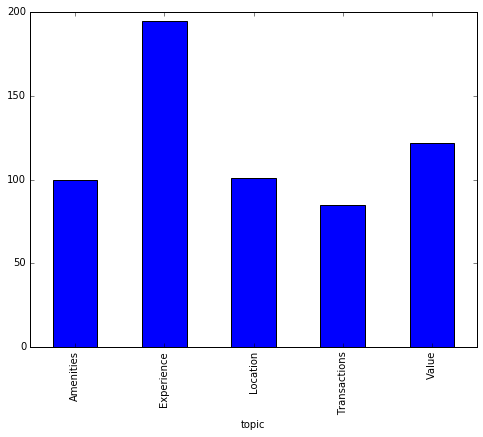

In [22]:
#checking for imbalanced classes 
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.figure(figsize=(8,6))
con_bhv_df.groupby('topic').word.count().plot.bar(ylim=0)
plt.show()

In [21]:
#there is class imbalance in our dataset which will cause majority class to be predicted more precisely(precision) and minor classes less precisely

In [22]:
# for extracting features from text i use the bag of words model: a model where for each document,
# words in our case, the presence (and often the frequency) 
# of words is taken into consideration, but the order in which they occur is ignored

In [23]:
# Specifically, for each term in our dataset, we will calculate a measure called Term Frequency,
# Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer
# to calculate a tf-idf vector for each of consumer complaint narratives:

In [ ]:
# near_df is set to True to use a logarithmic form for frequency.
# min_df is the minimum numbers of documents a word must be present in to be kept.
# norm is set to 5, to ensure all our feature vectors have a euclidian norm of 1.
# ngram_range is set to (1, 2,3,4) to indicate that we want to consider unigrams,bigrams,trigrams and quadgrams.

In [23]:
import copy

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1,4))
features = tfidf.fit_transform(con_bhv_df_labelencode.word).toarray()
labels = con_bhv_df_labelencode.topic_code
features.shape

/root/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(603, 137)

In [30]:
#each of 603 consumer word is represented by 134 features representing the tf-idf score for different unigrams and bigrams

In [31]:
# We can use sklearn.feature_selection.chi2 to find the words that are the most correlated with each of the topics:

In [25]:
category_id_df = con_bhv_df_labelencode[['topic', 'topic_code']].sort_values('topic_code')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['topic_code', 'topic']].values)

In [26]:
from sklearn.feature_selection import chi2
N = 2
for topic, topic_code in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == topic_code)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(topic))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Amenities':
  . Most correlated unigrams:
. shuttle
. pool
  . Most correlated bigrams:
. wi fi
. washing machine
# 'Experience':
  . Most correlated unigrams:
. view
. not
  . Most correlated bigrams:
. great staff
. staff friendly
# 'Location':
  . Most correlated unigrams:
. close
. location
  . Most correlated bigrams:
. location good
. great location
# 'Transactions':
  . Most correlated unigrams:
. desk
. check
  . Most correlated bigrams:
. desk staff
. front desk
# 'Value':
  . Most correlated unigrams:
. money
. value
  . Most correlated bigrams:
. great location
. value money


In [ ]:
# To train supervised classifiers,I've first transformed "word” into a vector of numbers.
# Explored vector representations such as TF-IDF weighted vectors.
# After having this vector representations of the text 
# we need to train supervised classifiers to train unseen “word” and predict the “topic” on which they fall.
# After all the above data transformation,
# now that i have all the features and labels, it is time to train the classifiers.

In [27]:
#Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [28]:
con_bhv_df_labelencode.dtypes

topic         object
word          object
lifecycle     object
topic_code     int64
dtype: object

In [29]:
con_df = con_bhv_df_labelencode[['word','topic_code']].copy()

In [30]:
#Extracting features from text, define target y and data X
count_vect = CountVectorizer()
X = count_vect.fit_transform(con_df['word'])
y = con_df['topic_code']

In [31]:
#Partitioning the data into test and training set
SPLIT_PERC = 0.75
split_size = int(len(y)*SPLIT_PERC)
X_train = X[:split_size]
X_test = X[split_size:]
y_train = y[:split_size]
y_test = y[split_size:]

In [32]:
#Training the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
from sklearn import metrics

In [35]:
#Evaluating the results
print("Accuracy on training set:")
print(clf.score(X_train, y_train))
print("Accuracy on testing set:")
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy on training set:
0.8849557522123894
Accuracy on testing set:
0.4768211920529801
Classification Report:
             precision    recall  f1-score   support

          0       0.43      0.27      0.33        11
          1       0.40      0.96      0.57        49
          2       0.79      0.62      0.70        24
          3       1.00      0.29      0.45        17
          4       0.67      0.04      0.08        50

avg / total       0.62      0.48      0.40       151



In [37]:
from sklearn.svm import LinearSVC, SVC

In [38]:
#Training the model
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [39]:
#Evaluating the results
print("Accuracy on training set:")
print(model.score(X_train, y_train))
print("Accuracy on testing set:")
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy on training set:
0.9469026548672567
Accuracy on testing set:
0.3973509933774834
Classification Report:
             precision    recall  f1-score   support

          0       0.08      0.45      0.14        11
          1       0.56      0.67      0.61        49
          2       0.80      0.67      0.73        24
          3       0.67      0.24      0.35        17
          4       0.40      0.04      0.07        50

avg / total       0.52      0.40      0.39       151



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [41]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [43]:
#Evaluating the results
print("Accuracy on training set:")
print(classifier.score(X_train, y_train))
print("Accuracy on testing set:")
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy on training set:
0.9557522123893806
Accuracy on testing set:
0.33112582781456956
Classification Report:
             precision    recall  f1-score   support

          0       0.09      0.73      0.15        11
          1       0.84      0.53      0.65        49
          2       0.92      0.46      0.61        24
          3       0.00      0.00      0.00        17
          4       0.50      0.10      0.17        50

avg / total       0.59      0.33      0.37       151



In [ ]:
#clearly models are overfitting  x

In [ ]:
#tryin out 

In [44]:
from __future__ import division
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from random import shuffle
from sklearn.cross_validation import train_test_split
import nltk
import numpy as np

/root/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# read input data

In [45]:
con_bhv_df_labelencode.dtypes

topic         object
word          object
lifecycle     object
topic_code     int64
dtype: object

In [47]:
con_bhv_df_labelencode.shape

(603, 4)

In [1]:
os.getcwd()

NameError: name 'os' is not defined

In [ ]:
orig_sents = []
sentences = []
fdata = open("/root/Arghya_scripts/Alenza/Alenza_nlp/tagged_plots.csv", 'rb')
for line in fdata:
    mid, text, label = line.strip().split("\t")
    orig_sents.append(text)
    tokens = tokenize_text(text)
    tags = tokenize_tags(label)
    sentences.append(LabeledSentence(words=tokens, tags=tags))
fdata.close()

In [ ]:
#trying out word embedding using word2vec